**Kajal Rahate**
## Problem Statement

Your task is to execute the process for proactive detection of fraud while answering following 
questions.
1. Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work

## About Dataset

###### This dataset contains below features, by taking below features into consideration we need to predict fraudulent transactions for a financial company by using any Supervised algorithm that suits our problem statement.

## Data Description:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading csv file
data=pd.read_csv('Fraud.csv')

In [3]:
#getting number of records and features
display('we have {} records with {} features'.format(data.shape[0],data.shape[1]))

'we have 6362620 records with 11 features'

In [4]:
#getting first five records
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#getting last five records
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
#getting information of features in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#getting information of numerical features
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Here standard deviation is not 0 for any feature which means we do not have any constant features in our dataset. 

In [8]:
# getting statastical information of catagorical features
data.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Exploratory Data Analysis
we will perform exploratory data analysis on raw data

In [10]:
#getting numeric features
num_features=data.select_dtypes(include=['int','float'])
display(num_features)
len(num_features.columns)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


8

In [11]:
#getting catagorical features
cat_features=data.select_dtypes(include='O')
display(cat_features)
len(cat_features.columns)

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


3

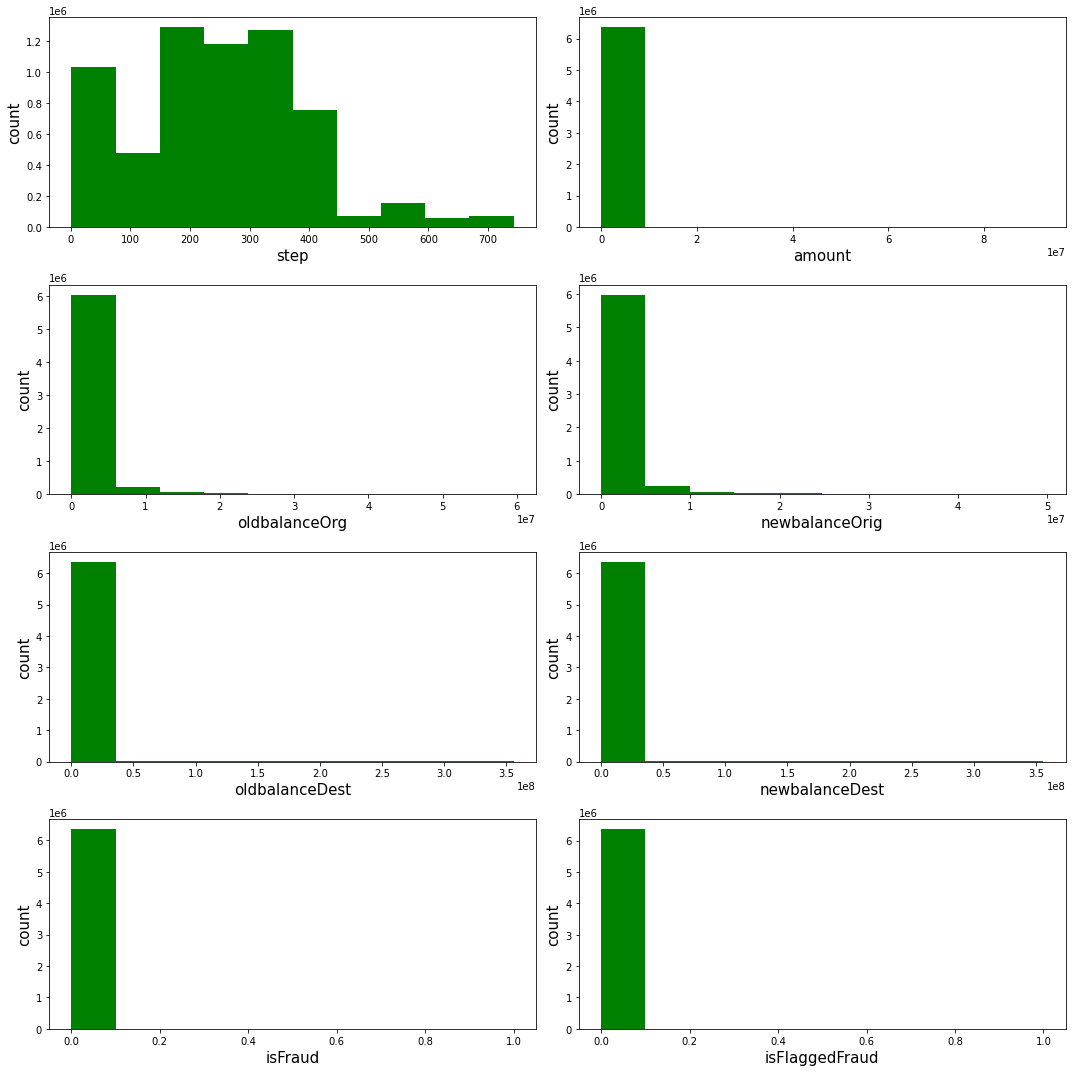

In [12]:
#univariant analysis of numerical features
plt.figure(figsize=(15,15))
plotnumber=1
for column in num_features:
    if plotnumber<9:
        plt.subplot(4,2,plotnumber)
        plt.hist(data[column],color='green')
        plt.xlabel(column,fontsize=15)
        plt.ylabel('count',fontsize=15)
        plotnumber+=1
plt.tight_layout()        

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

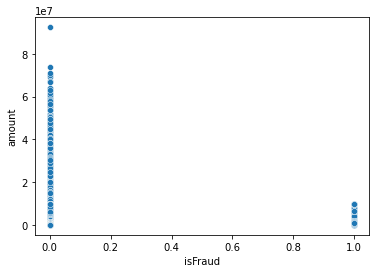

In [13]:
sns.scatterplot(data.isFraud,data.amount)

We can see that fraud is only when amount is low.

<AxesSubplot:xlabel='type', ylabel='count'>

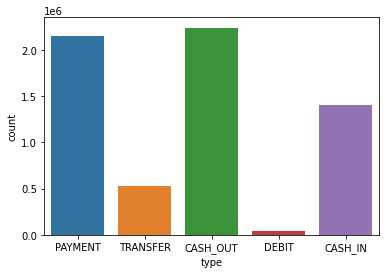

In [14]:
sns.countplot(data.type)

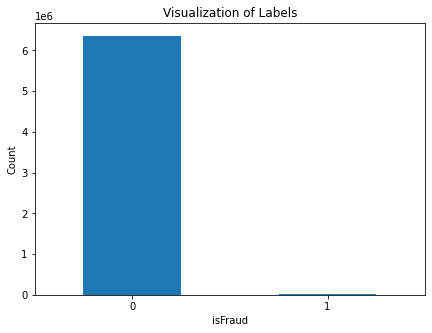

In [15]:
plt.figure(figsize=(7,5))
labels = [0,1]
count_classes = data.value_counts(data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

This is highly imbalance dataset, number of fraud transaction are significantly lower than other transaction.

<AxesSubplot:xlabel='type', ylabel='count'>

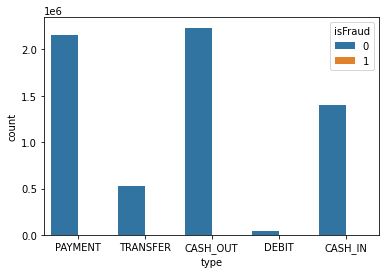

In [45]:
sns.countplot(data.type,hue=data['isFraud'],saturation=0.75)

In [16]:
IS_FRAUD=data.isFraud.value_counts()
IS_FRAUD

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
fraud_per=IS_FRAUD.values[0]/len(data.isFraud)*100
print(fraud_per)
not_fraud=IS_FRAUD.values[1]/len(data.isFraud)*100
print(not_fraud)
print('There are {} percentage of fraud transactions, and the percentage of trasaction that are not fraud is {}'.format(fraud_per,not_fraud))

99.87091795518198
0.12908204481801522
There are 99.87091795518198 percentage of fraud transactions, and the percentage of trasaction that are not fraud is 0.12908204481801522


<AxesSubplot:>

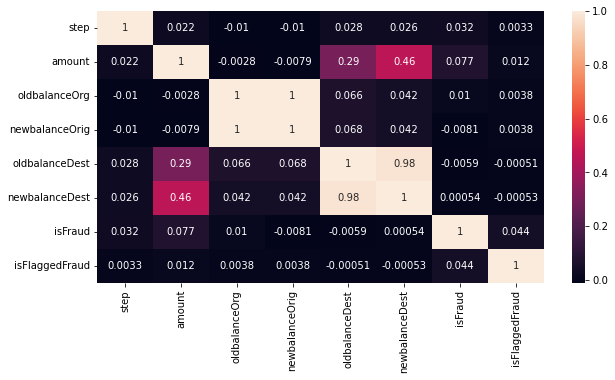

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

oldbalancedest and newbalancedet is highly corelated with each other,so we can remove one feature out of it.

In [19]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Data Preprocessing

In [20]:
#checking null values for all features
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in our dataset, so need to impute the null values

### converting Catagorical features to Numerical features 

In [21]:
cat_features

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [22]:
cat_features.type.value_counts() #this is ordinal features

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [23]:
cat_features.nameOrig.value_counts() #this is nominal features

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [24]:
cat_features.nameDest.value_counts()  #this is nominal feature

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [25]:
# for ordinal feature(type) we will use one hot encoding to convert catagorical values to numerical
encoded= pd.get_dummies(data[['type']])
encoded

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [26]:
#concatinating two dataframe
new_data=pd.concat([data,encoded],axis=1)
new_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [27]:
#we will remove type feature
new_data.drop('type',axis=1,inplace=True)

In [29]:
new_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    uint8  
 11  type_CASH_OUT   uint8  
 12  type_DEBIT      uint8  
 13  type_PAYMENT    uint8  
 14  type_TRANSFER   uint8  
dtypes: float64(5), int64(3), object(2), uint8(5)
memory usage: 515.8+ MB


In [31]:
#nameOrig and nameDest are nominal features,hence we will use label encoder techinque for converting num to catagorical
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
new_data['nameOrig']=label.fit_transform(new_data['nameOrig'])
new_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,1002156,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,5828262,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,3445981,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,5651847,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,1737278,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,533958,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,2252932,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [32]:
new_data['nameDest']=label.fit_transform(new_data['nameDest'])
new_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0,0,0,0,0,1


In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int32  
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        int32  
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  type_CASH_IN    uint8  
 11  type_CASH_OUT   uint8  
 12  type_DEBIT      uint8  
 13  type_PAYMENT    uint8  
 14  type_TRANSFER   uint8  
dtypes: float64(5), int32(2), int64(3), uint8(5)
memory usage: 467.2 MB


In [36]:
#converting oldbalanceOrg and newbalanceOrig into one coloumn
abs_balance = []
for i in range(len(new_data)):
    a = new_data.oldbalanceOrg[i] - new_data.newbalanceOrig[i]
    abs_balance.append(a)  
dest = []
for i in range(len(new_data)):
    b = new_data.oldbalanceDest[i] - new_data.newbalanceDest[i]
    dest.append(b)  

In [37]:
balace_abs = []
for i in abs_balance:
    balace_abs.append(round(i,2))
dest_abs = []
for j in dest:
    dest_abs.append(round(j,2))

In [40]:
#adding this two columns to new_data
new_data['balace_abs']=balace_abs
new_data['dest_abs']=dest_abs 

In [42]:
new_data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,0,0,1,0,9839.64,0.0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,0,0,1,0,1864.28,0.0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,0,0,1,181.00,0.0
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,1,0,0,0,181.00,21182.0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,0,0,1,0,11668.14,0.0


In [43]:
new_data.drop(['newbalanceOrig','oldbalanceOrg','newbalanceDest','oldbalanceDest'],axis=1,inplace=True)
new_data

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs
0,1,9839.64,757869,1662094,0,0,0,0,0,1,0,9839.64,0.00
1,1,1864.28,2188998,1733924,0,0,0,0,0,1,0,1864.28,0.00
2,1,181.00,1002156,439685,1,0,0,0,0,0,1,181.00,0.00
3,1,181.00,5828262,391696,1,0,0,1,0,0,0,181.00,21182.00
4,1,11668.14,3445981,828919,0,0,0,0,0,1,0,11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,5651847,505863,1,0,0,1,0,0,0,339682.13,-339682.13
6362616,743,6311409.28,1737278,260949,1,0,0,0,0,0,1,6311409.28,0.00
6362617,743,6311409.28,533958,108224,1,0,0,1,0,0,0,6311409.28,-6311409.27
6362618,743,850002.52,2252932,319713,1,0,0,0,0,0,1,850002.52,0.00


In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        int32  
 3   nameDest        int32  
 4   isFraud         int64  
 5   isFlaggedFraud  int64  
 6   type_CASH_IN    uint8  
 7   type_CASH_OUT   uint8  
 8   type_DEBIT      uint8  
 9   type_PAYMENT    uint8  
 10  type_TRANSFER   uint8  
 11  balace_abs      float64
 12  dest_abs        float64
dtypes: float64(3), int32(2), int64(3), uint8(5)
memory usage: 370.1 MB


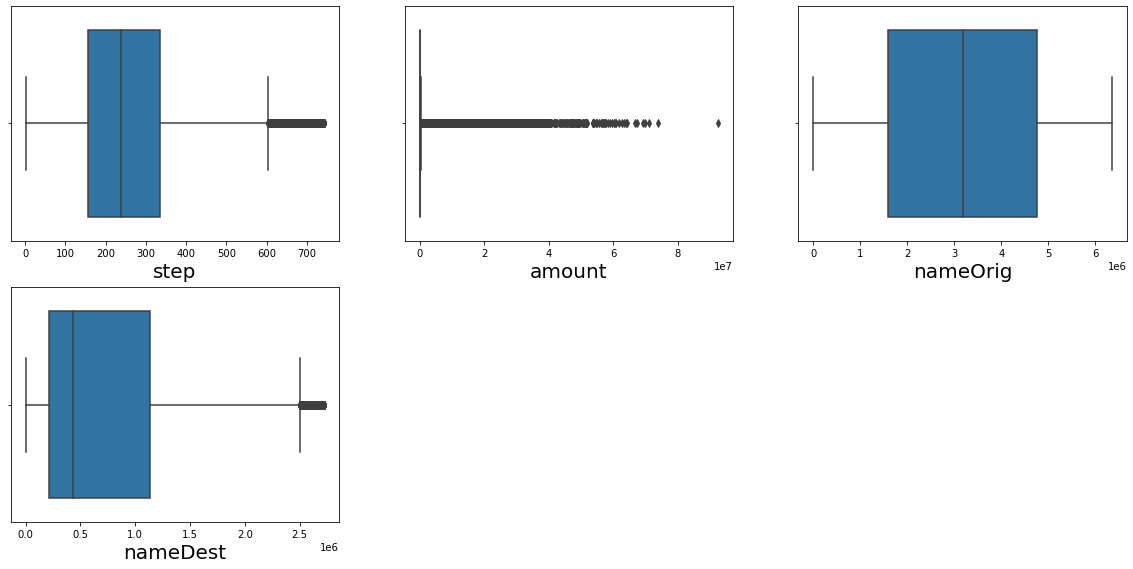

In [52]:
#checking outliers
data1=new_data[['step','amount','nameOrig','nameDest']]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data1:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(data1[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

- for nameorig we do not have any outliers
- for nameDest we have very less outliers
- for amount we have more numbers of outliers(the percentage are higher)
- for step we have outliers

<AxesSubplot:xlabel='step', ylabel='Density'>

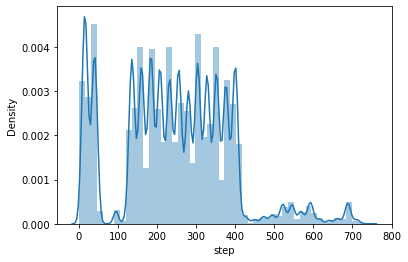

In [54]:
sns.distplot(new_data.step) #distribution of data is non normal

In [60]:
from scipy import stats
IQR = stats.iqr(new_data.step, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=new_data.step.quantile(0.25)#defining 25% of data
Q3=new_data.step.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(new_data.loc[new_data['step']<min_limit])
display(new_data.loc[new_data['step']>max_limit])
# Size of dataset
display(new_data.shape[0])
# size of data which are outliers
display(len(new_data.loc[data['step'] > max_limit]))
# percentage of data outliers
102688/6362620
# If outlier percentage is greater than 5% than no treatment.so,we will not handle outliers

'IQR is'

179.0

'min limit is'

-112.5

'max limit is'

603.5

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs


,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs
6259932,604,714218.48,4559968,419091,1,0,0,0,0,0,1,714218.48,0.00
6259933,604,714218.48,2745415,260728,1,0,0,1,0,0,0,714218.48,-714218.48
6259934,604,277582.53,3759934,444738,1,0,0,0,0,0,1,277582.53,0.00
6259935,604,277582.53,1684106,492647,1,0,0,1,0,0,0,277582.53,-277582.53
6259936,604,4672401.04,5701755,271564,1,0,0,0,0,0,1,4672401.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,5651847,505863,1,0,0,1,0,0,0,339682.13,-339682.13
6362616,743,6311409.28,1737278,260949,1,0,0,0,0,0,1,6311409.28,0.00
6362617,743,6311409.28,533958,108224,1,0,0,1,0,0,0,6311409.28,-6311409.27
6362618,743,850002.52,2252932,319713,1,0,0,0,0,0,1,850002.52,0.00


6362620

102688

0.016139263385209237

In [61]:
#we can remove/imput outliers in step features as their having only 1.61% of outliers

In [62]:
new_data.loc[new_data['step']>max_limit,'step']=np.median(new_data.step)#imputing outlier with median as it is non normal distribution

In [66]:
IQR = stats.iqr(new_data.amount, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=new_data.amount.quantile(0.25)#defining 25% of data
Q3=new_data.amount.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(new_data.loc[new_data['amount']<min_limit])
display(new_data.loc[new_data['amount']>max_limit])
# Size of dataset
display(new_data.shape[0]) # 3500
# size of data which are outliers
display(len(new_data.loc[new_data['amount'] > max_limit]))# 369
# percentage of data outliers
# If outlier percentage is greater than 5% than no treatment.
(338077/6362620)*100

'IQR is'

195331.935

'min limit is'

-279608.33249999996

'max limit is'

501719.38

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs


,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs
85,1,1505626.01,6113295,472721,0,0,0,0,0,0,1,0.00,-5486732.34
86,1,554026.99,1983067,502728,0,0,0,0,0,0,1,0.00,579285.56
88,1,761507.39,4421346,174831,0,0,0,0,0,0,1,0.00,-17889168.70
89,1,1429051.47,1708442,174831,0,0,0,0,0,0,1,0.00,-17127661.31
93,1,583848.46,2756831,84652,0,0,0,0,0,0,1,0.00,-1440000.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362613,239,1258818.82,1432154,71274,1,0,0,1,0,0,0,1258818.82,-1258818.83
6362616,239,6311409.28,1737278,260949,1,0,0,0,0,0,1,6311409.28,0.00
6362617,239,6311409.28,533958,108224,1,0,0,1,0,0,0,6311409.28,-6311409.27
6362618,239,850002.52,2252932,319713,1,0,0,0,0,0,1,850002.52,0.00


6362620

338077

5.313487211243166

for amount feature we have more than 5% of outliers in our dataset. so we cannot imput or remove these outliers
we can use the algorithms which are not or least impacted by outliers

In [68]:
IQR = stats.iqr(new_data.nameDest, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=new_data.nameDest.quantile(0.25)#defining 25% of data
Q3=new_data.nameDest.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(new_data.loc[new_data['nameDest']<min_limit])
display(new_data.loc[new_data['nameDest']>max_limit])
# Size of dataset
display(new_data.shape[0]) # 3500
# size of data which are outliers
display(len(new_data.loc[new_data['nameDest'] > max_limit]))
# percentage of data outliers
# If outlier percentage is greater than 5% than no treatment.
(216552/6362620)*100

'IQR is'

915614.5

'min limit is'

-1156526.75

'max limit is'

2505931.0

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs


,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balace_abs,dest_abs
12,1,2560.74,2129034,2692147,0,0,0,0,0,1,0,2560.74,0.0
52,1,2330.64,5752204,2620934,0,0,0,0,0,1,0,2330.64,0.0
100,1,871.75,10660,2711062,0,0,0,0,0,1,0,871.75,0.0
101,1,1035.36,5718861,2613886,0,0,0,0,0,1,0,1035.36,0.0
237,1,3608.41,5154883,2615430,0,0,0,0,0,1,0,3608.41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362218,239,2989.88,278508,2678858,0,0,0,0,0,1,0,2989.88,0.0
6362237,239,8034.53,2333927,2635510,0,0,0,0,0,1,0,8034.53,0.0
6362244,239,3346.02,378179,2537526,0,0,0,0,0,1,0,9.00,0.0
6362278,239,9178.47,339134,2674771,0,0,0,0,0,1,0,258.00,0.0


6362620

216552

3.4035035881445066

Scaling and outliers removal is not required if we will use tree based algorithms.

## Model Creation

In [79]:
## creating X and y
x=new_data[['step','amount','nameOrig','nameDest','isFlaggedFraud','type_CASH_IN','type_CASH_OUT','type_DEBIT',
           'type_PAYMENT','type_TRANSFER','balace_abs','dest_abs']]
y=new_data['isFraud']

In [80]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9996175579661628

In [84]:
y_hat=rf.predict(x_train)

In [85]:
accuracy_score(y_train,y_hat)

0.9999988773717207

In [ ]:
# we are getting good accuracy(99%) for training as well as testing. our model is low biased and low variance model

### Report
- We have seen that Accuracy of both Random Forest and Decision Tree is equal, although the precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and non fraud transaction to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.

- This is also one of the reason why Random Forest and Decision Tree are used instead of other algorithms.


- Also the reason I have chosen this model is because of highly unbalanced dataset (non_fraud: Fraud :: 99.87:1.67). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


- Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

Below preventive measure should take to avoid fraud transactions-

- Use smart vertified apps only.
- Browse through secured websites.
- Use secured internet connections (USE VPN).
- Keep your mobile and laptop security updated.
- Don't respond to unsolicited calls/SMS/E-mails.
- If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?

- Bank sending E-statements.
- Customers keeping a check of their account activity.
- Always keep a log of your payments.